In [1]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read the CSV files
Mouse_metadata = pd.read_csv("Mouse_metadata.csv")
Study_results = pd.read_csv("Study_results.csv")

In [3]:
# Build DataFrames
mouse_df = pd.read_csv("Mouse_metadata.csv")
study_df = pd.read_csv("Study_results.csv")

In [4]:
df = pd.merge(mouse_df, study_df, on="Mouse ID")
df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [5]:
regimen_group = df.groupby(["Drug Regimen"])
mouse_group = df.groupby(["Mouse ID"])
gender_group = df.groupby(["Sex"])
regi_gender_group = df.groupby(["Drug Regimen","Sex"])
regi_mouse_group = df.groupby(["Drug Regimen","Mouse ID"])

In [6]:
# List SEM of the tumor volume for each regimen
tumor_summary = pd.DataFrame({
    "Tumor Mean":regimen_group['Tumor Volume (mm3)'].mean(),
    "Tumor Median":regimen_group['Tumor Volume (mm3)'].median(),
    "Tumor Variance":regimen_group['Tumor Volume (mm3)'].var(),
    "Tumor Stdev":regimen_group['Tumor Volume (mm3)'].std(),
    "Tumor SEM":regimen_group['Tumor Volume (mm3)'].sem(),
})
tumor_summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Stdev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0.5, 1.0, 'Number of Observations for Each Drug Regimen')

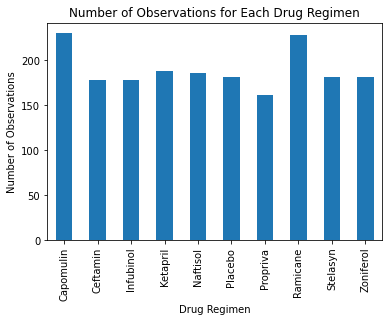

In [7]:
# Generate bar plot to show the number of data points for each treatment regimen using pandas
regimen_count = regimen_group['Mouse ID'].count()
regimen_count.plot(kind="bar")
plt.ylabel("Number of Observations")
plt.title("Number of Observations for Each Drug Regimen")

In [8]:
# Create Lists
regimen_list = regimen_count.index.to_list()
best_regimens = ['Capomulin','Ceftamin','Infubinol','Ramicane']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

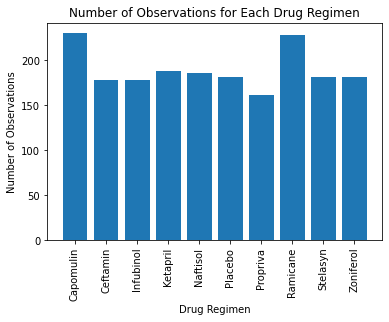

In [9]:
# Generate bar plot to show the number of data points for each treatment regimen using pyplot
plt.bar(regimen_list, regimen_count)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")
plt.title("Number of Observations for Each Drug Regimen")
plt.xticks(rotation='vertical')

Text(0, 0.5, 'Gender Distribution')

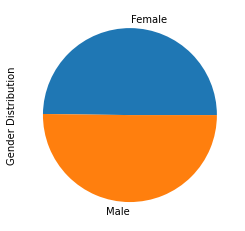

In [10]:
# Generate a Pie Plot to show the 'Gender' distribution of Female Versus Male mice using pandas
gender_output = gender_group['Mouse ID'].unique()
gender_map = gender_output.map(len)
gender_pie = gender_map.plot.pie(y='Sex')
plt.ylabel('Gender Distribution')

Text(0, 0.5, 'Gender Distribution')

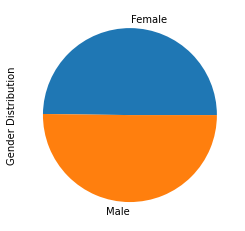

In [11]:
# Generate a Pie Plot to show the 'Gender' distribution of Female versus Male mice using pyplot
plt.pie(gender_map, labels=["Female","Male"])
plt.ylabel('Gender Distribution')

In [12]:
# Calculate the final tumor volume for all mice across four of the most promising treatment regimens.
regi_mice = regi_mouse_group.last()
best_regis = [b for b in best_regimens]
regi_output = [regi_mice['Tumor Volume (mm3)'][best_regis]]
regi_output_df = pd.DataFrame(regi_output).transpose().reset_index()
regi_output_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [13]:
# Extract the top 4 regimens from the data frame to perform IQR test each one.
# Calculate the IQR, quantitatively determine the potential for any outliers.

# REMINDER: Best Item List: ['Capomulin','Ceftamin','Infubinol','Ramicane']

tumor_vols = [regi_output_df.loc[regi_output_df['Drug Regimen'] == best_regimens[i], 'Tumor Volume (mm3)'] for i in range(4)]

for i in range(4):
    quartiles = tumor_vols[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The IQR for regimen at 'Best Regimen' List Item {i+1} is {iqr}'.")
    if (lower_bound < tumor_vols[i].min()) & (upper_bound > tumor_vols[i].max()):
        print(f"\tThere are no outliers at 'Best Regimen' List Item {i+1}'.")
    else:
        print(f"\tThere is at least 1 outlier at 'Best Regimen' List Item {i+1}'.")

The IQR for regimen at 'Best Regimen' List Item 1 is 7.78'.
	There are no outliers at 'Best Regimen' List Item 1'.
The IQR for regimen at 'Best Regimen' List Item 2 is 15.58'.
	There are no outliers at 'Best Regimen' List Item 2'.
The IQR for regimen at 'Best Regimen' List Item 3 is 11.48'.
	There is at least 1 outlier at 'Best Regimen' List Item 3'.
The IQR for regimen at 'Best Regimen' List Item 4 is 9.1'.
	There are no outliers at 'Best Regimen' List Item 4'.


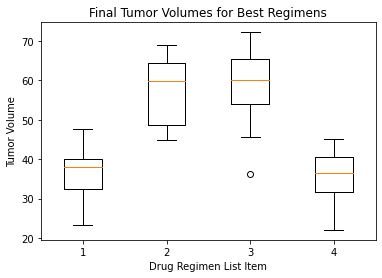

In [14]:
# Generate Box Plot of the final tumor volume for each mouse across the four regimens of interest.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Best Regimens')
ax1.set_xlabel('Drug Regimen List Item')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vols)
plt.show()

Text(0.5, 1.0, 'Tumor Volume of a Mouse over Time')

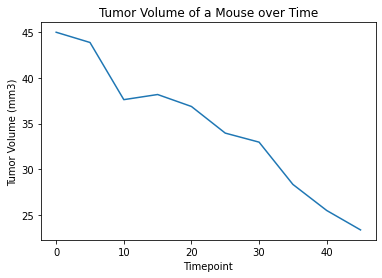

In [15]:
# Generate Line Plot for 'Time Point' versus 'Tumor Volume for each mouse treated with Capomulin.
mouse_1_vol = (df['Tumor Volume (mm3)'][10:20].to_list())
mouse_1_time = (df['Timepoint'][10:20].to_list())
plt.plot(mouse_1_time, mouse_1_vol)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of a Mouse over Time")

Text(0.5, 1.0, 'Mouse Weights against Average Tumor Volumes')

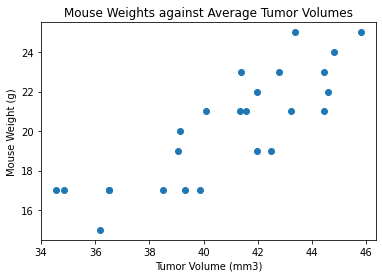

In [16]:
# Generate a Scatter Plot of Mouse weight Vs. average Tumor volume for the Capomulin regimen.
mouse_sub_list = df[df['Drug Regimen'] == 'Capomulin']
mouse_sub_list_id = mouse_sub_list['Mouse ID'].unique()
mouse_sub_list_avg_vol = pd.Series([mouse_group.get_group(m)['Tumor Volume (mm3)'].mean() for m in mouse_sub_list_id])
mouse_sub_list_weight = pd.Series([mouse_group.get_group(m)['Weight (g)'].sum()/mouse_group.get_group(m)['Weight (g)'].count() for m in mouse_sub_list_id])
plt.scatter(mouse_sub_list_avg_vol, mouse_sub_list_weight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Mouse Weights against Average Tumor Volumes")

The R-Value between Mouse Weights and Tumor Volumes is 0.84 for Capomulin Mice.


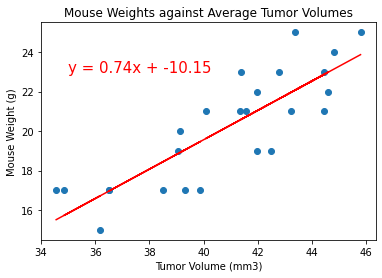

In [17]:
# Add the Linear regression equation and Line to plot

x_values = mouse_sub_list_avg_vol
y_values = mouse_sub_list_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

slope, intercept, r_value, p_value, std_err = sp.linregress(x_values, y_values)
print(f"The R-Value between Mouse Weights and Tumor Volumes is {round(r_value,2)} for Capomulin Mice.")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,23),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.title("Mouse Weights against Average Tumor Volumes")
plt.show()